In [23]:
!pip install -q -U watermark


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [24]:
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
%reload_ext watermark
%watermark -a "Juliana Santimaria" 

Author: Juliana Santimaria



In [26]:
df_mod = pd.read_csv("dataset.csv")

In [27]:
df_mod.shape

(101766, 50)

In [28]:
df_mod.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222167,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [30]:
df_mod.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [31]:
df_mod.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [32]:
df_mod.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [33]:
df_mod.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [34]:
for col in list(df_mod.columns):

    list_of_unique_values = df_mod[col].unique()
    
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

In [35]:
for col in df_mod.columns:
    if df_mod[col].dtype == object:
        if df_mod[col][df_mod[col] == '?'].count() > 0:
            print('\nColuna', col, 'tem', df_mod[col][df_mod[col] == '?'].count(), 'valores com o caracter "?"')
            print('Isso representa', round(df_mod[col][df_mod[col] == '?'].count() / len(df_mod.index) * 100, 2), '% do total')


Coluna race tem 2273 valores com o caracter "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 valores com o caracter "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 valores com o caracter "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 valores com o caracter "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 valores com o caracter "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 valores com o caracter "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 valores com o caracter "?"
Isso representa 1.4 % do total


In [36]:
print('\nColuna gender tem', df_mod['gender'][df_mod['gender'] == 'Unknown/Invalid'].count(), 'valores com "Unknown/Invalid"')
print('Isso representa', round(df_mod['gender'][df_mod['gender'] == 'Unknown/Invalid'].count() / len(df_mod.index) * 100, 2), '% do total')


Coluna gender tem 3 valores com "Unknown/Invalid"
Isso representa 0.0 % do total


In [37]:
df_mod = df_mod.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [38]:
f_mod = df_mod[df_mod['race'] != '?']
df_mod = df_mod[df_mod['diag_1'] != '?']
df_mod = df_mod[df_mod['diag_2'] != '?']
df_mod = df_mod[df_mod['diag_3'] != '?']
df_mod = df_mod[df_mod['gender'] != 'Unknown/Invalid']

In [39]:
df_mod.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [40]:
df_mod.shape

(100241, 47)

In [41]:
df_mod.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [42]:
df_mod.loc[:, df_mod.nunique() == 1].head()

,examide,citoglipton
1,No,No
2,No,No
3,No,No
4,No,No
5,No,No


In [43]:
df_mod = df_mod.loc[:, df_mod.nunique() != 1]

In [44]:
df_mod.shape

(100241, 45)

In [45]:
total_valores = df_mod.shape[0]

valores_ausentes = df_mod.isnull().sum()

percentual_ausentes = (valores_ausentes / total_valores) * 100

percentual_ausentes[percentual_ausentes > 0]

Series([], dtype: float64)

In [46]:
df_mod = df_mod.drop(['max_glu_serum', 'A1Cresult'], axis = 1)

In [47]:
df_mod.shape

(100241, 43)

In [49]:
df_mod.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [50]:
df_mod['readmitted'].value_counts()

NO     53818
>30    35173
<30    11250
Name: readmitted, dtype: int64

In [51]:
dados_clean1 = df_mod.copy()

In [52]:
df_mod['readmitted'] = df_mod['readmitted'].replace('>30', 1)
df_mod['readmitted'] = df_mod['readmitted'].replace('<30', 1)
df_mod['readmitted'] = df_mod['readmitted'].replace('NO', 0)

In [53]:
df_mod['readmitted'].unique()

array([1, 0])

In [54]:
df_mod['readmitted'].dtype

dtype('int64')

In [55]:
df_mod.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,1


In [56]:
round(df_mod.readmitted.value_counts() / len(df_mod.index) * 100, 0)

0    54.0
1    46.0
Name: readmitted, dtype: float64

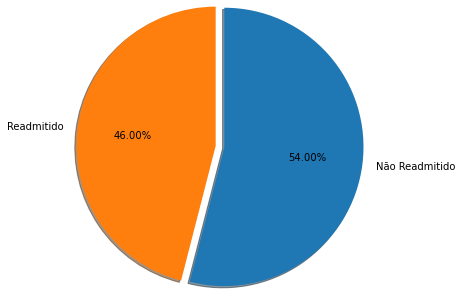

In [57]:
percentual = round(df_mod.readmitted.value_counts() / len(df_mod.index) * 100, 0)

labels = ['Não Readmitido', 'Readmitido']

plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

In [58]:
df_mod.age.dtype

dtype('O')

In [59]:
df_mod.groupby('age').size()

age
[0-10)         65
[10-20)       469
[20-30)      1515
[30-40)      3616
[40-50)      9474
[50-60)     17044
[60-70)     22287
[70-80)     25896
[80-90)     17090
[90-100)     2785
dtype: int64

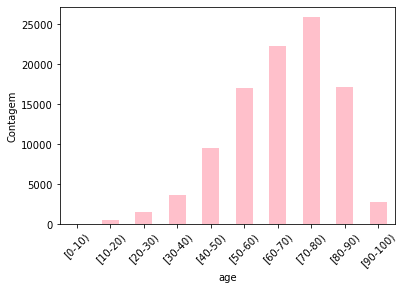

In [62]:
df_mod.groupby('age').size().plot(kind = 'bar', color = 'pink')

plt.ylabel('Contagem')

plt.xticks(rotation = 45)

plt.show()

In [63]:
df_mod['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                          for val in df_mod['age']], index = df_mod.index)

df_mod['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                          for val in df_mod['age']], index = df_mod.index)


In [64]:
df_mod.age.dtype

dtype('O')

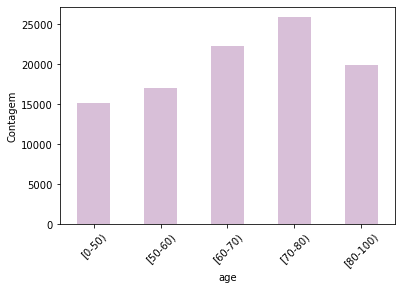

In [65]:
df_mod.groupby('age').size().plot(kind = 'bar', color = 'thistle')

plt.ylabel('Contagem')

plt.xticks(rotation = 45)

plt.show()

In [66]:
df_mod.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,1


In [67]:
df_mod.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7])

In [68]:
df_mod.admission_type_id.nunique()

8

In [69]:
df_mod.admission_type_id.value_counts()

1    53230
3    18544
2    18203
6     5199
5     4719
8      315
7       21
4       10
Name: admission_type_id, dtype: int64

In [70]:
df_mod['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro' 
                                        for val in df_mod['admission_type_id']], index = df_mod.index)

In [71]:
df_mod.admission_type_id.nunique()

2

In [72]:
df_mod.admission_type_id.value_counts()

Emergencia    53230
Outro         47011
Name: admission_type_id, dtype: int64

In [73]:
df_mod.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [74]:
df_mod.discharge_disposition_id.nunique()

26

In [75]:
df_mod.discharge_disposition_id.value_counts()

1     59003
3     13897
6     12830
18     3642
2      2115
22     1981
11     1640
5      1167
25      956
4       805
7       604
23      406
13      398
14      371
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [76]:
df_mod['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro' 
                                              for val in df_mod['discharge_disposition_id']], index = df_mod.index)

In [77]:
df_mod.discharge_disposition_id.nunique()

2

In [78]:
df_mod.discharge_disposition_id.value_counts()

Casa     59003
Outro    41238
Name: discharge_disposition_id, dtype: int64

In [79]:
df_mod.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [80]:
df_mod.admission_source_id.nunique()

17

In [81]:
df_mod.admission_source_id.value_counts()

7     56797
1     29035
17     6683
4      3144
6      2144
2      1092
5       852
3       179
20      161
9       112
8        15
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [82]:
df_mod['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro' 
                                              for val in df_mod['admission_source_id']], index = df_mod.index)


In [83]:
df_mod.admission_source_id.nunique()

3

In [84]:
df_mod.admission_source_id.value_counts()

Sala_Emergencia    56797
Recomendacao       29035
Outro              14409
Name: admission_source_id, dtype: int64